# Vázquez Martínez Fredin Alberto

# 3. Práctica: Vectores a palabras

**Fecha de entrega: 16 de Marzo de 2025 @ 11:59pm**

Obtenga la matriz de co-ocurrencia para un corpus en español y realice los siguientes calculos:
- Las probabilidades conjuntas
$$p(w_i,w_j) = \frac{c_{i,j}}{\sum_i \sum_j c_{i,j}}$$
- Las probabilidades marginales
$$p(w_i) = \sum_j p(w_i,w_j)$$
- Positive Point Wise Mutual Information (PPMI):
$$PPMI(w_i,w_j) = \max\{0, \log_2 \frac{p(w_i,w_j)}{p(w_i)p(w_j)}\}$$

**Comparación de representaciones**

Aplica reducción de dimensionalidad de los vectores de la matríz con PPMI y de los vectores entrenados en español:

- Realiza un plot de 100 vectores aleatorios (que esten tanto en la matríz como en los vectores entrenados)
- Compara los resultados de los plots:
    - ¿Qué representación dirías que captura mejor relaciones semánticas?
    - Realiza un cuadro comparativo de ambos métodos con ventajas/desventajas

### 📁 [Carpeta con vectores](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=drive_link)

---
# Desarrollo

Obtenga la matriz de co-ocurrencia para un corpus en español y realice los siguientes calculos:
- Las probabilidades conjuntas
$$p(w_i,w_j) = \frac{c_{i,j}}{\sum_i \sum_j c_{i,j}}$$
- Las probabilidades marginales
$$p(w_i) = \sum_j p(w_i,w_j)$$
- Positive Point Wise Mutual Information (PPMI):
$$PPMI(w_i,w_j) = \max\{0, \log_2 \frac{p(w_i,w_j)}{p(w_i)p(w_j)}\}$$

---


Para la matriz de co-ocurrencia se hace uso de la función creada en el notebook de la ayudantía.

In [98]:
from datasets import load_dataset
import pandas as pd
import numpy as np

import nltk
from collections import Counter
from itertools import combinations
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
ds = load_dataset("mariagrandury/fake_news_corpus_spanish")

# Otros datasets:
#ds = load_dataset("spanish-ir/messirve", "ar")

In [ ]:
##############################
# Cargando un Corpus en español
##############################

# Preprocesando texto
def preprocesando_corpus(documentos):
  """
    Preprocesa una lista de documentos aplicando limpieza, eliminación de stopwords
    y filtrado de palabras de longitud menor o igual a 1.

    Parameters
    ----------
    documentos : list of str
        Una lista de cadenas donde cada elemento representa un documento de texto
        que será sometido a preprocesamiento.

    Returns
    -------
    list of list of str
        Una lista donde cada elemento es una lista de palabras que representa el
        documento procesado.

  """
  
  documentos_preprocesados = []

  for documento in documentos:
      documento = documento.lower()

      documento = re.sub(r'[^a-záéíóúñü\s]', '', documento)

      palabras = documento.split()

      palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

      palabras_filtradas = [palabra for palabra in palabras if len(palabra)>1]

      documento_preprocesado = ' '.join(palabras_filtradas)

      documentos_preprocesados.append(documento_preprocesado.split())

  return documentos_preprocesados

sentences = preprocesando_corpus(ds['test']['TEXT'])

vocab = set(word for sentence in sentences for word in sentence)
indices = {word: i for i, word in enumerate(vocab)}


In [101]:
for sentence in sentences[:5]:
    print(sentence)

['el', 'control', 'de', 'la', 'covid', 'no', 'es', 'sólo', 'un', 'tema', 'de', 'médicos', 'el', 'resto', 'del', 'personal', 'sanitario', 'científico', 'por', 'desgracia', 'por', 'fortuna', 'es', 'un', 'asunto', 'esencialmente', 'político', 'que', 'se', 'decide', 'por', 'hombres', 'mujeres', 'que', 'se', 'dedican', 'la', 'política', 'de', 'las', 'creencias', 'opiniones', 'de', 'estos', 'últimos', 'depende', 'el', 'éxito', 'el', 'fracaso', 'de', 'las', 'acciones', 'que', 'se', 'implementen', 'los', 'éxitos', 'en', 'la', 'toma', 'de', 'decisiones', 'salvan', 'vidas', 'naciones', 'obviamente', 'los', 'errores', 'matan', 'más', 'si', 'están', 'acompañados', 'de', 'mentiras', 'medias', 'verdades', 'en', 'este', 'sentido', 'durante', 'el', 'pasado', 'pulso', 'de', 'la', 'salud', 'de', 'febrero', 'el', 'presidente', 'lópez', 'rompió', 'un', 'récord', 'en', 'los', 'primeros', 'diez', 'minutos', 'había', 'dicho', 'tres', 'mentiras', 'graves', 'medias', 'verdades', 'que', 'también', 'son', 'menti

In [ ]:
##############################
# Código creado en ayudantía
##############################
def get_coocurrence_matrix(sentences: list[list[str]], indices: dict[str, int], n: int = 2) -> np.ndarray:
    matrix = np.zeros((len(indices), len(indices)))
    for sent in sentences:
        for term1, term2 in combinations(sent, 2):
            matrix[indices[term1], indices[term2]] += 1
            matrix[indices[term2], indices[term1]] += 1
    return matrix


##################################
# Funciones de cálculos para PPMI
##################################
def joint_probabilities(matrix: np.ndarray) -> np.ndarray:
    '''
    Calcula las probabilidades conjuntas a partir de una matriz de co-ocurrencias.

    Esta función normaliza una matriz para obtener las probabilidades conjuntas
    dividiendo cada elemento entre la suma total de la matriz.

    Parameters
    ----------
    matrix : np.ndarray
        Matriz de co-ocurrencias donde cada entrada representa la frecuencia
        conjunta de dos elementos.

    Returns
    -------
    np.ndarray
        Matriz de probabilidades conjuntas con los valores normalizados entre 0 y 1.
    '''

    total = np.sum(matrix)
    return matrix / total


def marginal_probabilities(joint_probs: np.ndarray) -> np.ndarray:
    '''
    Calcula las probabilidades marginales a partir de las probabilidades conjuntas.

    La probabilidad marginal de cada fila se obtiene sumando los valores de esa fila.
    Esta función asume que las probabilidades conjuntas están normalizadas.
    
    Parameters
    ----------
    joint_probs : np.ndarray
        Matriz de probabilidades conjuntas normalizadas.

    Returns
    -------
    np.ndarray
        Vector de probabilidades marginales sumadas a lo largo de las columnas.

    '''
    return np.sum(joint_probs, axis=1)


def ppmi(joint_probs: np.ndarray, marginal_probs: np.ndarray) -> np.ndarray:
    '''
    Calcula la matriz de PPMI (Pointwise Positive Mutual Information).

    La PPMI mide cuán diferente es la probabilidad conjunta de dos eventos
    respecto a su independencia. Si el valor es negativo, se establece como cero.

    La fórmula es:
    PPMI(i, j) = max(0, log2(P(i, j) / (P(i) * P(j))))

    Parameters
    ----------
    joint_probs : np.ndarray
        Matriz de probabilidades conjuntas normalizadas.
    marginal_probs : np.ndarray
        Vector de probabilidades marginales de las filas.

    Returns
    -------
    np.ndarray
        Matriz de PPMI donde los valores negativos se reemplazan por 0.
    '''
    ppmi_matrix = np.zeros_like(joint_probs)
    for i in range(joint_probs.shape[0]):
        for j in range(joint_probs.shape[1]):
            if joint_probs[i, j] > 0:
                ppmi_value = np.log2(joint_probs[i, j] / (marginal_probs[i] * marginal_probs[j]))
                ppmi_matrix[i, j] = max(0, ppmi_value)
    return ppmi_matrix

In [103]:
coocurrence_matrix = get_coocurrence_matrix(sentences, indices)
C = pd.DataFrame(data=coocurrence_matrix, index=list(indices.keys()), columns=list(indices.keys()))
C

,hologramas,extienden,sueca,reiteradas,clorhexidina,asolan,revocada,prim,indirectas,acelerada,...,estarás,invertir,solicitando,creando,usarla,gratuita,ayudó,reseñó,regalado,dirigidas
hologramas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extienden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
sueca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reiteradas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clorhexidina,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gratuita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ayudó,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reseñó,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
regalado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
joint_probs = joint_probabilities(coocurrence_matrix)

marginal_probs = marginal_probabilities(joint_probs)

ppmi_matrix = ppmi(joint_probs, marginal_probs)

In [105]:
print("Probabilidades conjuntas:\n", joint_probs)
print("Probabilidades marginales:\n", marginal_probs)
print("PPMI:\n")

ppmi_matrix_dataframe = pd.DataFrame(data=ppmi_matrix, index=list(indices.keys()), columns=list(indices.keys()))
display(ppmi_matrix_dataframe)

Probabilidades conjuntas:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Probabilidades marginales:
 [3.89019403e-06 5.87851543e-06 4.20140956e-06 ... 1.18867040e-06
 1.00928923e-05 1.65592593e-05]
PPMI:



,hologramas,extienden,sueca,reiteradas,clorhexidina,asolan,revocada,prim,indirectas,acelerada,...,estarás,invertir,solicitando,creando,usarla,gratuita,ayudó,reseñó,regalado,dirigidas
hologramas,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
extienden,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,4.943053,0.0,0.0,0.0
sueca,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
reiteradas,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
clorhexidina,0.0,0.000000,0.0,0.0,8.386163,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gratuita,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,4.500655,0.000000,0.0,0.0,0.0
ayudó,0.0,4.943053,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
reseñó,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
regalado,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.048442,0.0,0.000000,0.000000,0.0,0.0,0.0


**Comparación de representaciones**

Aplica reducción de dimensionalidad de los vectores de la matríz con PPMI y de los vectores entrenados en español:

- Realiza un plot de 100 vectores aleatorios (que esten tanto en la matríz como en los vectores entrenados)
- Compara los resultados de los plots:
    - ¿Qué representación dirías que captura mejor relaciones semánticas?
    - Realiza un cuadro comparativo de ambos métodos con ventajas/desventajas

### 📁 [Carpeta con vectores](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=drive_link)

### Cargando el modelo
El modelo seleccionado es word2vec pero entrenado de la forma cbow, tomando el medium por cuestiones de tamaño.

Así mismo, la elección del tamaño de vector de 300 de longitud se debe a que suele ser el tamaño común que se usa para este tipo de representaciones.

In [ ]:
from gensim.models import word2vec
from enum import Enum
import random

##############################
# Código creado en ayudantía
##############################

MODELS_DIR = 'Model/'

def load_model(model_path: str):
    try:
        print(model_path)
        return word2vec.Word2Vec.load(model_path)
    except:
        print(f"[WARN] Model not found in path {model_path}")
        return None


class Algorithms(Enum):
    CBOW = 0
    SKIP_GRAM = 1


def train_model(sentences: list, model_name: str, vector_size: int, window=5, workers=2, algorithm = Algorithms.CBOW):
    model_name_params = f"{model_name}-vs{vector_size}-w{window}-{algorithm.name}.model"
    model_path = MODELS_DIR + model_name_params
    if load_model(model_path) is not None:
        print(f"Already exists the model {model_path}")
        return load_model(model_path)
    print(f"TRAINING: {model_path}")
    if algorithm in [Algorithms.CBOW, Algorithms.SKIP_GRAM]:
        print(f"Algorithm: {algorithm.name}")
        model = word2vec.Word2Vec(
            sentences,
            vector_size=vector_size,
            window=window,
            workers=workers,
            sg = algorithm.value,
            seed=42,
            )
    else:
        print("[ERROR] algorithm not implemented yet :p")
        return
    try:
        model.save(model_path)
    except:
        print(f"[ERROR] Saving model at {model_path}")
    return model

def report_stats(model) -> None:
    """Print report of a model"""
    print("Number of words in the corpus used for training the model: ", model.corpus_count)
    print("Number of words in the model: ", len(model.wv.index_to_key))
    print("Time [s], required for training the model: ", model.total_train_time)
    print("Count of trainings performed to generate this model: ", model.train_count)
    print("Length of the word2vec vectors: ", model.vector_size)
    print("Applied context length for generating the model: ", model.window)

In [107]:
%%time
cbow_model = train_model(
    sentences,
    "fake_news_corpus_spanish",
    vector_size=300,
    window=10, # una ventana contextual de 10 palabras, por ambos lados de la palabra central. 
    workers=2,
    algorithm=Algorithms.CBOW
)

Model/fake_news_corpus_spanish-vs300-w10-CBOW.model
Already exists the model Model/fake_news_corpus_spanish-vs300-w10-CBOW.model
Model/fake_news_corpus_spanish-vs300-w10-CBOW.model
CPU times: total: 78.1 ms
Wall time: 73 ms


In [108]:
report_stats(cbow_model)

Number of words in the corpus used for training the model:  572
Number of words in the model:  5818
Time [s], required for training the model:  0.746392500019283
Count of trainings performed to generate this model:  1
Length of the word2vec vectors:  300
Applied context length for generating the model:  10


## Realizando la comparación de resultados

In [113]:
vector_cbow = cbow_model.wv["comunista"]

vector_distribucional = list(ppmi_matrix_dataframe.iloc[[indices['comunista']]].values[0])

print('Observando los dos vectores generados por cada vectorizador de la palabra Comunista:')
print('Vector generado con Word2Vec Cbow:',vector_cbow)
print('\n')
print('Vector distribucional:',vector_distribucional)

Observando los dos vectores generados por cada vectorizador de la palabra Comunista:
Vector generado con Word2Vec Cbow: [ 2.29280144e-02  4.47124466e-02 -3.06120869e-02 -9.86523554e-02
  9.84087959e-03 -4.37181219e-02  5.43836392e-02  1.91599913e-02
 -2.54512317e-02  1.07577443e-01  5.36881723e-02  3.71013768e-02
  3.65142263e-02  5.69177531e-02  1.69907454e-02 -5.36125228e-02
 -6.21688645e-03 -1.17801130e-01 -1.14048645e-01 -4.97268289e-02
  1.31470472e-01  6.91478476e-02 -6.92606047e-02  1.30513251e-01
  1.01502091e-01  3.52348797e-02 -1.87628314e-01  4.44618659e-03
 -4.75681241e-04  5.98071031e-02 -1.87862143e-02 -3.02449837e-02
 -4.78998795e-02  1.50162177e-02  2.95311166e-03 -5.33283968e-03
 -6.83154073e-03 -1.84349760e-01 -1.46942567e-02  7.08119711e-03
  1.46688716e-02  1.68717988e-02  7.91182742e-02  3.97727825e-02
  1.94041952e-02  6.14758618e-02  1.05890438e-01  1.33542731e-01
  1.03120282e-01  6.19389378e-02 -1.52027681e-01 -1.06468745e-01
 -1.93518458e-03  4.97272313e-02  5

**Comentarios**
Se puede notar la gran existencía de dispersión de los datos para el vector realizado con co ocurrencias, la existencia de ceros es por el hecho de que no siempre aparecerá ocurrencias con todas las palabras de ceros, provocando que para representar las ocurrencias importantes, tenga que ser de una longitud demasiado grande el vector. Teniendon así que la mayoría de la matriz está compuesta de ceros, y la longitud es del mismo tamaño del vocabulario básicamente.

Por otro lado, word 2 vec nos permite una representación en cualquier tamaño, siendo esté un hiperparámetro, haciendo que sea fácil ver que no presenta el problema de dispersión.

## Realizando representación con 100 vectores aleatorios

In [110]:
from sklearn.decomposition import PCA

# Seleccionando 100 vectores aleatorios

palabras_compartidas = list(set(cbow_model.wv.key_to_index.keys()) & vocab) # esto es porque la cantidad de palabras usadas son: Number of words in the corpus used for training the model:  572


random.seed(42)
selected_words = random.sample(list(palabras_compartidas), 100)

ppmi_indices = [indices[word] for word in selected_words]

ppmi_vectores = [list(ppmi_matrix_dataframe.iloc[[indice]].values[0]) for indice in ppmi_indices]

vectores_w2v = np.array([cbow_model.wv[word] for word in selected_words])

# Reducción de dimensionalidad
pca = PCA(n_components=2)
w2v_2d = pca.fit_transform(vectores_w2v)
ppmi_2d = pca.fit_transform(ppmi_vectores)

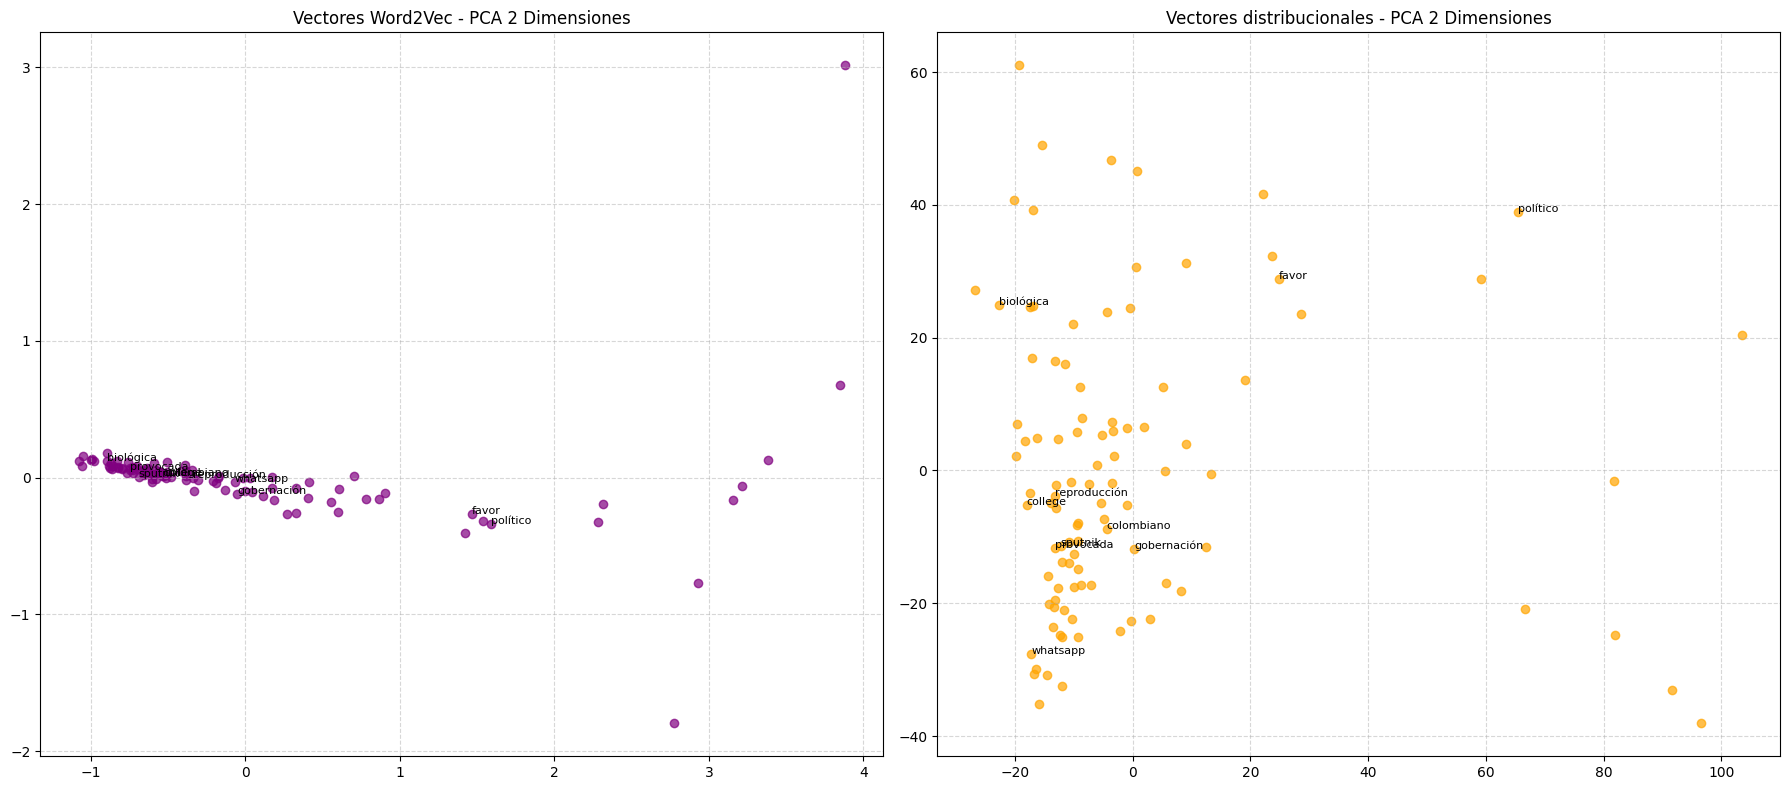

In [111]:
import matplotlib.pyplot as plt

# Realizando el plot

plt.figure(figsize=(18, 8))

# representacion gráfica de word 2 vec
plt.subplot(1, 2, 1)
plt.scatter(w2v_2d[:, 0], w2v_2d[:, 1], alpha=0.7, c='purple')
plt.title('Vectores Word2Vec - PCA 2 Dimensiones')
plt.grid(True, linestyle='--', alpha=0.5)


for i, word in enumerate(selected_words[:10]):  # Primeras 10 para claridad
    plt.annotate(word, (w2v_2d[i, 0], w2v_2d[i, 1]), fontsize=8)

# representacion gráfica de vectores distribucionales
plt.subplot(1, 2, 2)
plt.scatter(ppmi_2d[:, 0], ppmi_2d[:, 1], alpha=0.7, c='orange')
plt.title('Vectores distribucionales - PCA 2 Dimensiones')
plt.grid(True, linestyle='--', alpha=0.5)


for i, word in enumerate(selected_words[:10]):
    plt.annotate(word, (ppmi_2d[i, 0], ppmi_2d[i, 1]), fontsize=8)

plt.tight_layout()
plt.show()


## Comparación de resultados (comentarios):



**A grandes rasgos**, podemos notar que en efecto parece existir una misma tendencia a cómo se están agrupando los vectores. Siendo que en las dos representaciones vectoriales se tiene una distribución hacía la derecha para la mayoría de palabras seleccionadas. Mientras que hay pocas palabras en el lado izquierdo. De manera general podríamos decir que sí hay una representación más o menos similar usando ambos formas de vectorizar.

**Con más detalle**: Vemos para el caso de Word2Vec se manera muy bien la dispersión entre vectores, de manera que el intervalo donde se define cada vector también es muy chico, a comparación de los vectores creados con la matriz de co-ocurrencia, nos da el problema que no parece guardar tan bien la relación semántica existente entre los vectores, algo que sí parece lograr word2vec, donde vemos que al estar agrupados más cerca podemos intuir que existe una relación semántica para esos vectores. Pero en el caso de los vectores distribucionales no tenemos tan claro, parece existir una tendencia pero solo eso.  Así mismo, otro problema que tenemos con respecto a estos vectores es que en el gran intervalo donde se encuentran definidos, lo cual puede ser consecuencia directa de su dipsersión y la manera en que se representan los vectores en el espacio, por ello parece que tienen mayores distancias entre ellos.

Por lo anterior, se puede decir que word 2 vec parece capturar de mejor manera las relaciones semánticas.

| **Característica**                   | **Word2Vec**                                                                 | **Vectores con Matriz de Co-ocurrencias**                           |
|-------------------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------|
| **Ventajas**                        | 1. El tamaño del vector es un hiperparámetro ajustable.                     | 1. Los vectores son más baratos de computar.                      |
|                                     | 2. Ofrecen representaciones no tan dispersas.                              | 2. Ofrecen cierto grado de representación semántica.              |
|                                     | 3. Representan mejor las relaciones semánticas.                            | 3. Son interpretables.                                             |
|                                     | 4. Ofrecen mayor calidad en su representación.                             |                                                                   |
|                                     | 5. Pueden manejar palabras no vistas.                                      |                                                                   |
| **Desventajas**                     | 1. Costosos de computar debido al backpropagation.                          | 1. Su representación semántica es limitada.                      |
|                                     | 2. Necesitan un gran corpus para el entrenamiento.                         | 2. Presentan una gran dispersión en sus datos (mayoría de ceros). |
|                                     | 3. Dependen del corpus para manejar palabras no vistas.                    | 3. El tamaño de los vectores suele ser demasiado grande.          |
|                                     |                                                                             | 4. Necesitan un corpus grande para hacer buenas representaciones. |
|                                     |                                                                             | 5. Manejan mal palabras no vistas.                                |


